In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from scipy.optimize import curve_fit
#from numba import njit
#import numba

plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams.update({'font.size': 22})

In [2]:
m = 1
δm = 1e7
M = δm
g = 1
μ = m/M
Ω = 2*g*μ

In [3]:
def Params(N,L,s,μ,g,Ω):
    a = np.arange(1,N+1,dtype=np.float64)
    b = np.arange(1,L+1,dtype=np.float64)
    
    #ω_0 = np.sqrt(4*g)
    ω_0 = 1
    ω_a = ω_0*np.sin(np.pi*(2*a-1)/(2*(2*N+1)))
    ω_b = ω_0*np.sin(np.pi*b/(2*(L+1)))
    
    ϵ_bp = -g*np.sqrt(2*μ/(L+1))*np.sin(L*np.pi*b/(L+1))
    ϵ_bm = -g*np.sqrt(2*μ/(L+1))*np.sin(np.pi*b/(L+1))
    ϵ_a = -2*g*np.sqrt(μ/(2*N+1))*np.sin(np.pi*(2*a-1)/(2*N+1))
    
    n = len(s)
    G_p = -s**2 - Ω**2
    G_m = -s**2 - Ω**2
    
    for i in range(n):
        t_1 = np.sum(ϵ_a**2/(s[i]**2 + ω_a**2))
        t_2 = np.sum(ϵ_bm**2/(s[i]**2 + ω_b**2))
        t_3 = np.sum(ϵ_bm*ϵ_bp/(s[i]**2 + ω_b**2))
        G_p[i] = G_p[i] + t_1 + t_2 + t_3
        G_m[i] = G_m[i] + t_1 + t_2 - t_3
    
    return ω_a,ω_b,G_p,G_m

In [4]:
n = 10000
s = np.linspace(0.01,0.2,n)
size = 50
L = np.arange(0,size,dtype=np.int32)

N_sites = 1000

#Second config
Ls = 500
Ns = N_sites-Ls
ω_es, ω_bs, G_ps, G_ms = Params(Ns, Ls, s, μ, g, Ω)

Energy = np.zeros((size,1))

#plt.figure()

for i in range(size):
    #First config
    Lf = L[i]
    Nf = N_sites - L[i]
    ω_ef, ω_bf, G_pf, G_mf = Params(Nf, Lf, s, μ, g, Ω)
    
    f = G_pf*G_mf/(G_ps*G_ms)
    
    Energy[i] = np.pi*(np.sum(ω_ef)-np.sum(ω_es)+np.sum(ω_bf)-np.sum(ω_bs))+simps(np.log(f[f>0]),s[f>0])    
    #plt.plot(s,f,'.')

    
#plt.xlabel('s')
#plt.ylabel('')
#plt.show()

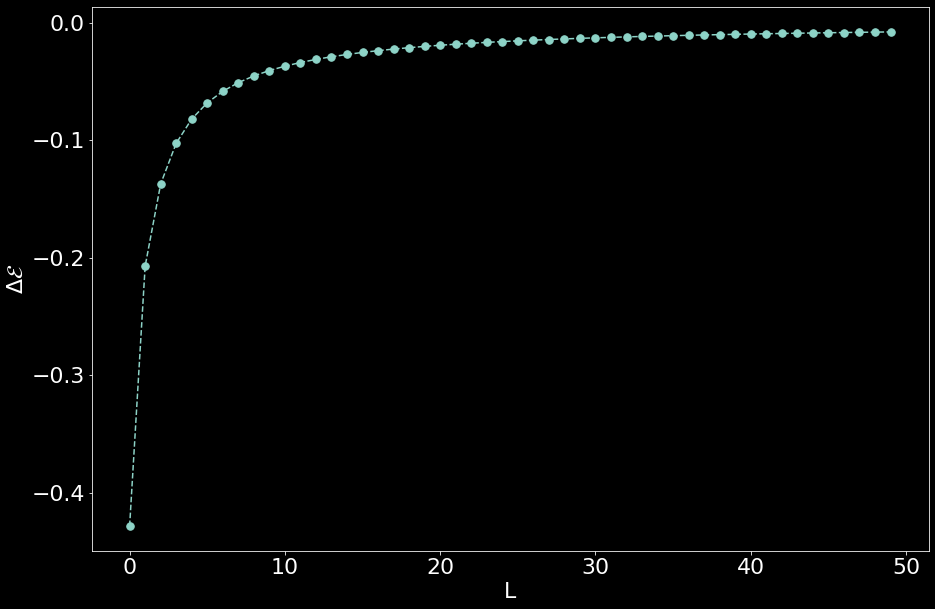

In [5]:
plt.plot(L,Energy,'.--',ms=15)
plt.xlabel('L')
plt.ylabel('$\Delta \mathcal{E}$')
plt.savefig("Caseng.png",dpi=400,transparent=True)

[-0.42739739  1.         -1.02790577]
Ecuación: 
 -0.427*(x1.0)^-1.028


/home/alejandro/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


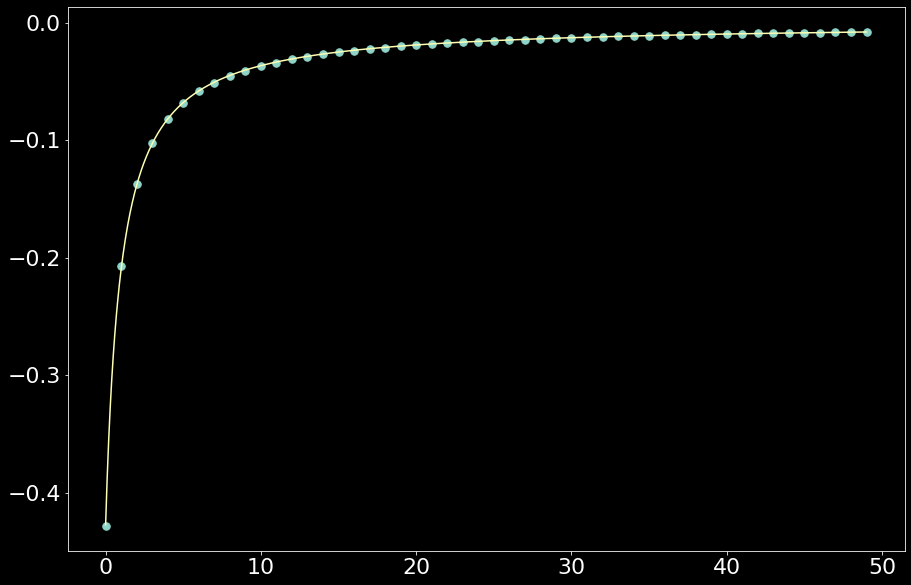

In [6]:
def Energy_model(x,a,b,c):
    return a*(x+1)**c 

fit_energy,_ = curve_fit(Energy_model,L,Energy.flatten())
print(fit_energy)
a,b,c = fit_energy[0],fit_energy[1],fit_energy[2]

L_dense = np.linspace(L[0],L[-1],1000)
Energy_dense = Energy_model(L_dense,a,b,c)

print("Ecuación: \n",str(a.round(3))+"*(x"+str(b.round(3))+")^"+str(c.round(3)))

plt.plot(L,Energy,'.',ms=15)
plt.plot(L_dense,Energy_dense,'-')

Text(0, 0.5, 'F')

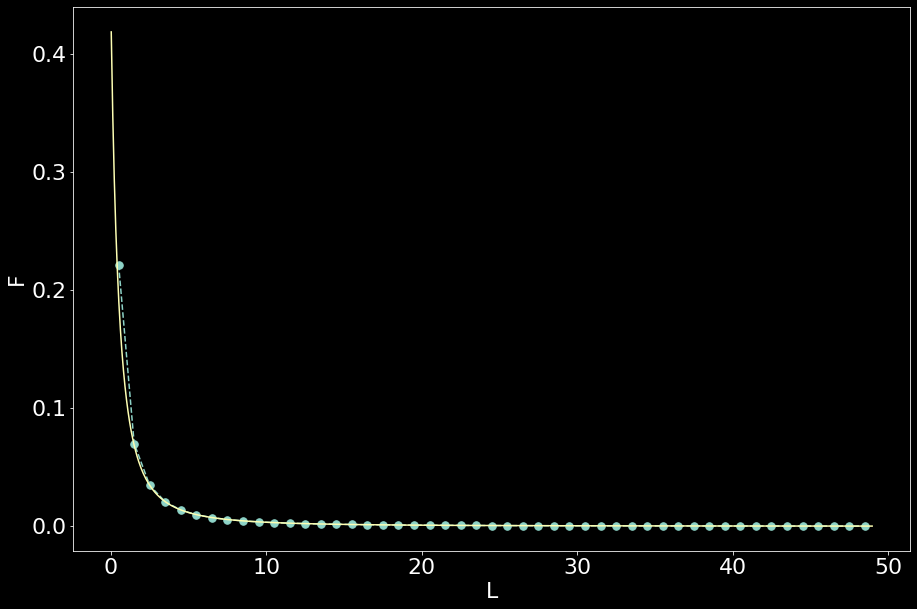

In [7]:
F = np.diff(Energy.flatten())/np.diff(L)
F_dense = np.diff(Energy_dense)/np.diff(L_dense)

def avg_arr(A):
    n = len(A)
    A_new = np.zeros(n-1)
    for i in range(n-1):
        A_new[i] = (A[i] + A[i+1])/2
    return A_new

plt.plot(avg_arr(L),F,'.--',ms=15)
plt.plot(avg_arr(L_dense),F_dense,'-',ms=15)
plt.xlabel('L')
plt.ylabel('F')

/home/alejandro/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[ 0.53630857  1.         -2.18738322]


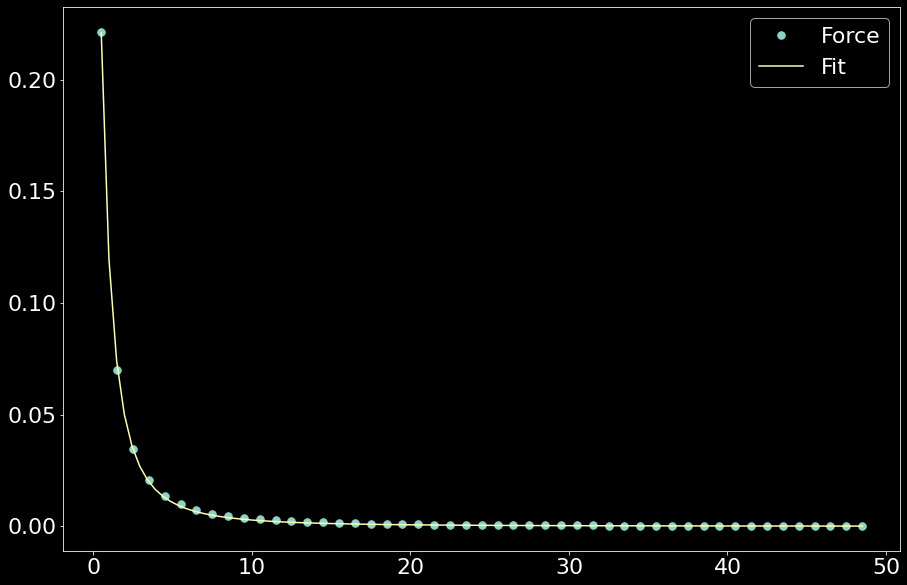

In [8]:
x_vals = avg_arr(L)
y_vals = F

def model(x,a,b,c):
    return a*(x+1)**c

fit,_ = curve_fit(model,x_vals,y_vals)
print(fit)

x_vals_dense = np.linspace(x_vals[0],x_vals[-1],100)
y_fit = model(x_vals_dense,fit[0],fit[1],fit[2])

plt.plot(x_vals,y_vals,'.',ms=15)
plt.plot(x_vals_dense,y_fit)
plt.legend(['Force','Fit'])
plt.savefig("Casenforce.png",dpi=400,transparent=True)